Objective: 
 * Predict whether a customer will purchase a product or service based on their:
  1. Demographic and 
  2. Behavioral data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Find main working repository
import sys 
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
import scripts.feature_engineering as fe
import scripts.model_selection as ms
import scripts.hyperparameter_tuning as ht
import scripts.model_evaluation as me
import scripts.principal_component as pc
import scripts.feature_importance as fi
import scripts.confusion_matrix as cm
import scripts.roc_curve as rc

In [4]:
# Load data
df = pd.read_csv('../data/bank-full.csv', delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Convert Categorical variable to numerical variables using label encoder

In [6]:
df = fe.label_encoding(df)

Coreelation Matrix

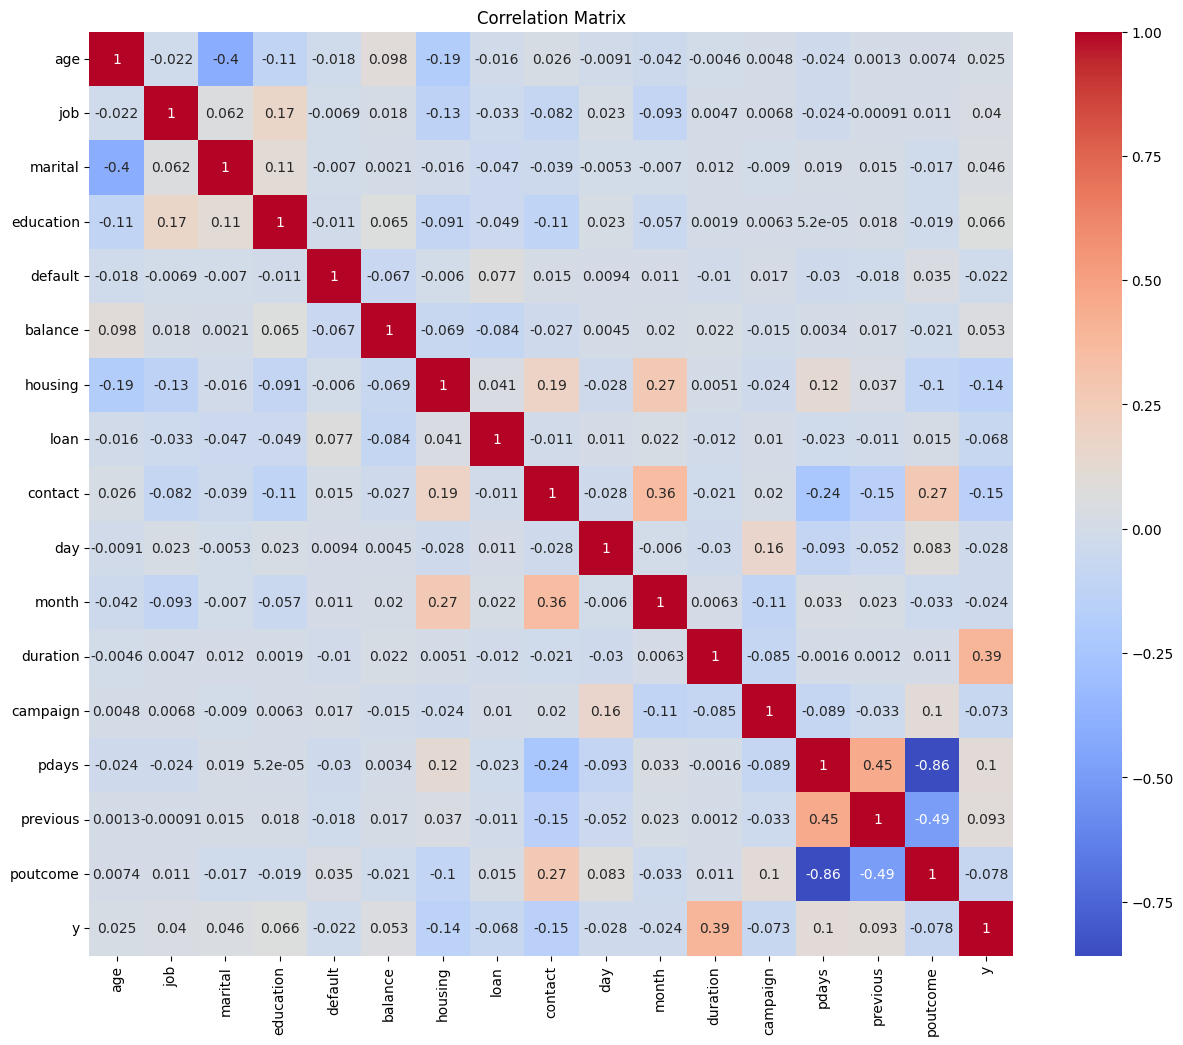

In [7]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [8]:
df = fe.feature_enginerring(df)

Splitting Data into Training and Testing Sets

In [9]:
# Split the data into training and testing sets
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

In [10]:
# select the best model
dt, rf = ms.model_selection(X_train, y_train)

Decision Tree cross-validation score: 0.8742535259763287
Random Forest cross-validation score: 0.904998944834027


Hyperparameter Tuning using GridSearchCV

In [11]:
# Hyperparameter for DTC and RFR
best_params_dt, best_params_rf = ht.hyperparameter_tuning(X_train, y_train)

Best Hyperparameters for Decision Tree Classifier: {'max_depth': 10, 'min_samples_split': 10}
Best Accuracy for Decision Tree Classifier: 0.8994138620867304
Best Hyperparameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 200}
Best Accuracy for Random Forest Classifier: 0.9058561310150337


Model Evaluation

In [12]:
# Train and Evaluate the model
clf_dt, clf_rf, y_pred_dt, y_pred_rf = me.train_and_evaluate(X_train, y_train, X_test, y_test, best_params_dt, best_params_rf)

Decision Tree Classifier Accuracy: 0.8922923808470641
Random Forest Classifier Accuracy: 0.9000331748313612


Principal Component Analysis (PCA)

Explained Variance Ratio: [0.99173056 0.00715815]


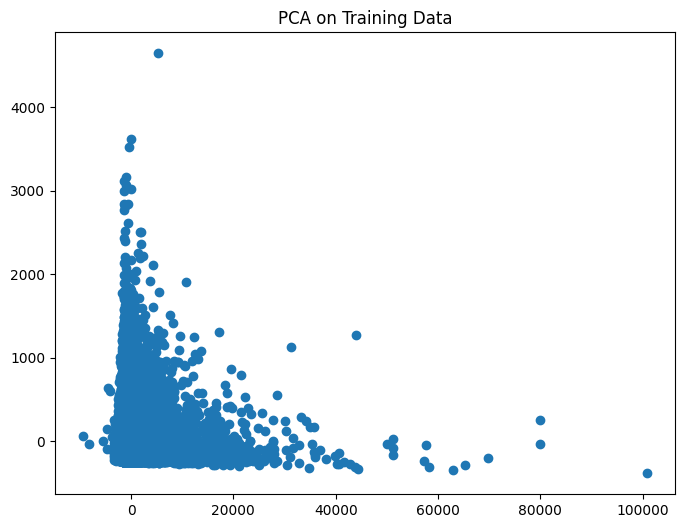

In [13]:
X_train_pca = pc.principal_component(X_train)

Feature Importances for Decision Tree Classifier 

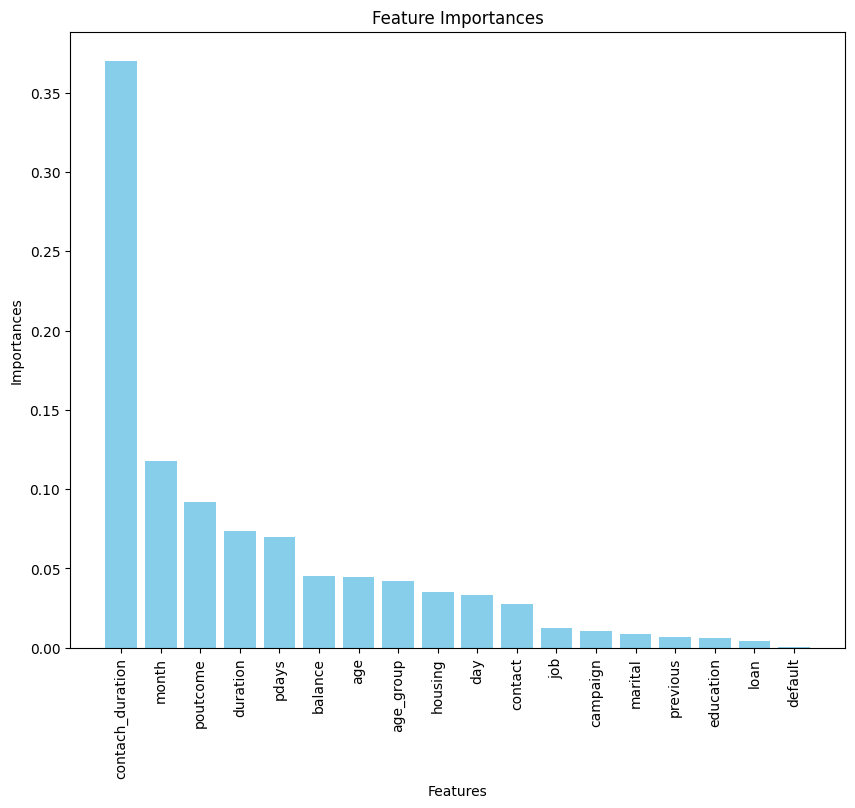

In [18]:
# Plot Decision tree Classifier 
fi.plot_feature_importance(clf_dt, X)

Feature Importances for Random Forest Classifier 

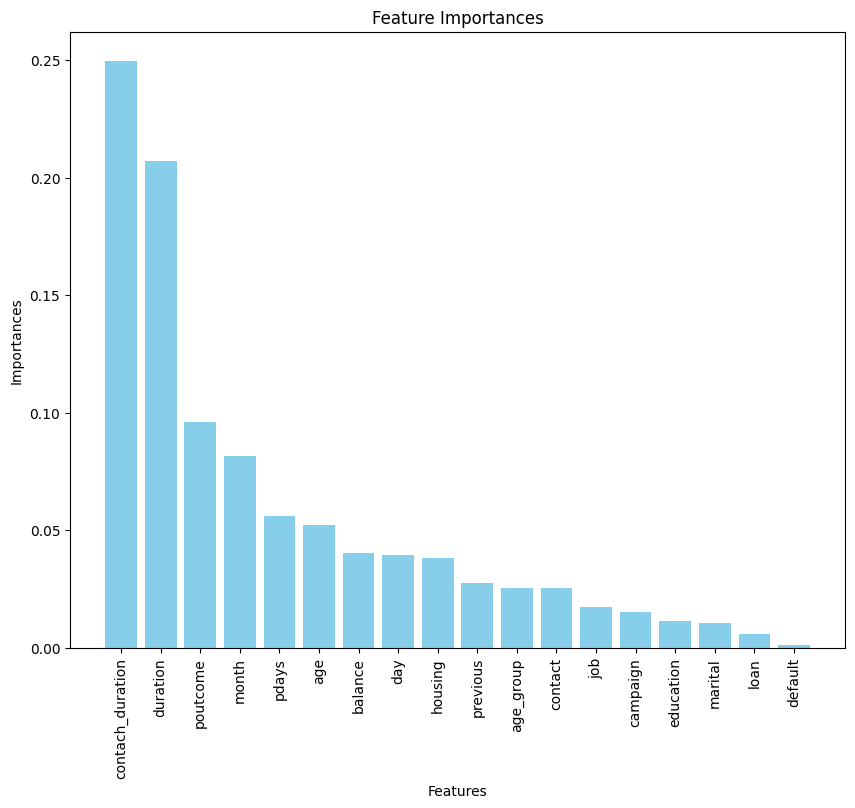

In [19]:
# Plot Random Fores Classifier 
fi.plot_feature_importance(clf_rf, X)

Confusion Matrix for Decision Tree Classifier

In [20]:
# Assuming y_test, y_pred_dt, and y_pred_rf are already defined
cm.evaluate_models(y_test, y_pred_dt, y_pred_rf)

Confusion Matrix for Decision Tree Classifier:
 [[7619  333]
 [ 641  450]]
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.57      0.41      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.69      0.71      9043
weighted avg       0.88      0.89      0.88      9043

Confusion Matrix for Random Forest Classifier:
 [[7717  235]
 [ 669  422]]
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.39      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



ROC curve for Decission Tree Classifier and Random Forest Classifier

In [17]:
# models = {
#        'Decision Tree': clf_dt,
#        'Random Forest': clf_rf
#    }
# rc.plot_roc_curves(X_test, y_test, models)